# Autoencoder como PCA - Ejemplo simple

In [45]:
# synthetic classification dataset
from sklearn.datasets import make_classification
import sklearn.model_selection

In [68]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=100, n_informative=10, n_redundant=90, n_clusters_per_class=2, class_sep=0.8, flip_y=0.02, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 100) (10000,)


In [69]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 100) (7000,)
(3000, 100) (3000,)


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [71]:
# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)

In [98]:
# This is the dimension of the original space
input_dim = X_train.shape[1]

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(512, activation=tf.nn.leaky_relu, input_shape=(input_dim,)),
    BatchNormalization(),
    Dense(256, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(128, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(64, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(32, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(latent_dim, activation=tf.nn.leaky_relu)
])

decoder = Sequential([
    Dense(32, activation=tf.nn.leaky_relu, input_shape=(latent_dim,)),
    BatchNormalization(),
    Dense(64, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(128, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(256, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(512, activation=tf.nn.leaky_relu),
    BatchNormalization(),
    Dense(input_dim, activation=None)
])

In [99]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

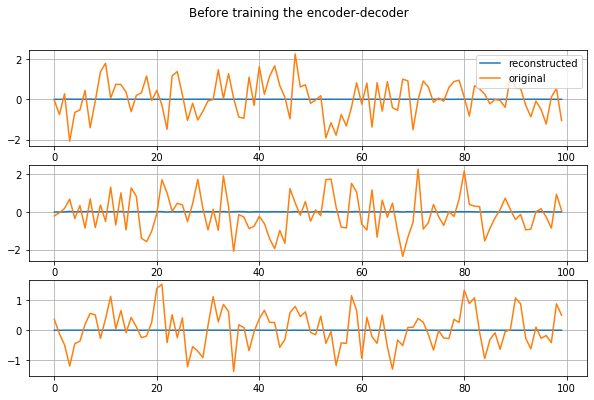

In [100]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

### Entrenamiento del Autoencoder

Epoch 1/5000
1/1 [==============================] - 0s 13ms/step - loss: 2.6895
Epoch 2/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.6590
Epoch 3/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.4028
Epoch 4/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.1161
Epoch 5/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.0234
Epoch 6/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.9709
Epoch 7/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9182
Epoch 8/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.8678
Epoch 9/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.8237
Epoch 10/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.7874
Epoch 11/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.7582
Epoch 12/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.7357
Epoch 13/5000
1/1 [==================

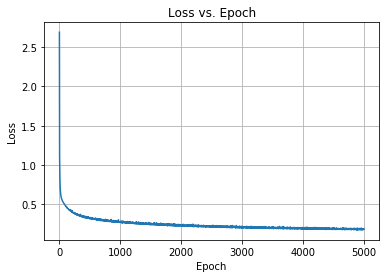

In [101]:
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=12800, verbose=True)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

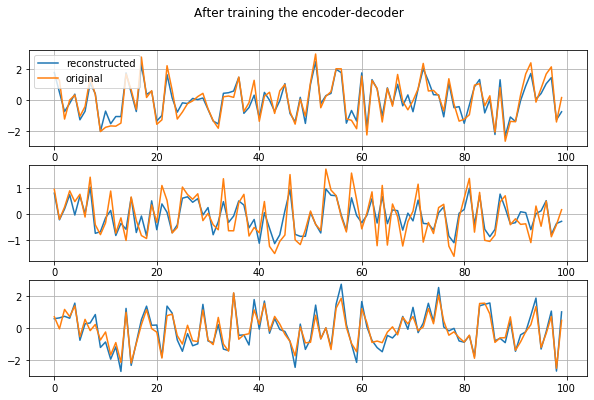

In [102]:
plot_orig_vs_recon('After training the encoder-decoder')

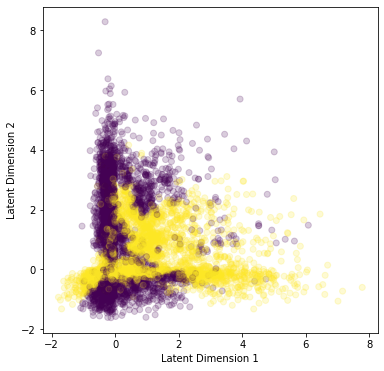

In [109]:
encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=.2, c=y_train)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

## PCA

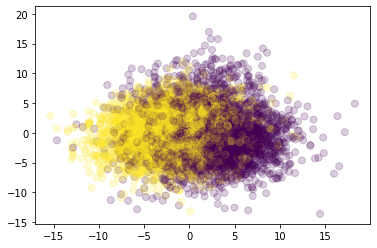

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=latent_dim)
X_pca = pca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

## ICA

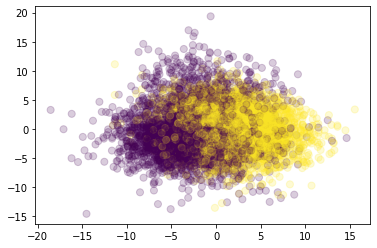

In [111]:
from sklearn.decomposition import IncrementalPCA
i_pca = IncrementalPCA(n_components=latent_dim)
X_pca = i_pca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

# Kernel PCA

### RBF

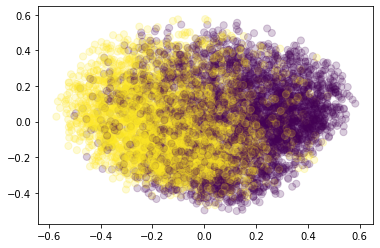

In [112]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=latent_dim, kernel="rbf")
X_pca = kpca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

### Poly

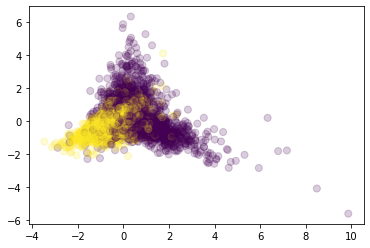

In [113]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=latent_dim, kernel="poly")
X_pca = kpca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

### Sigmoid

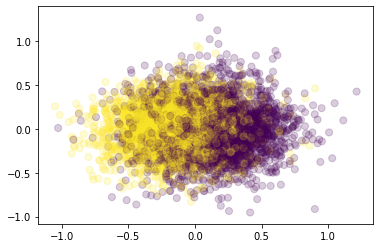

In [114]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=latent_dim, kernel="sigmoid")
X_pca = kpca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

### Cosine

C:\Users\cami1\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


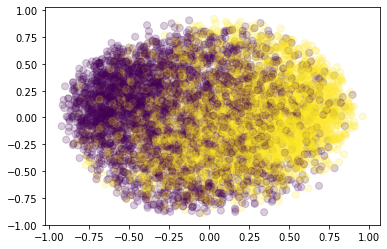

In [115]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=latent_dim, kernel="cosine")
X_pca = kpca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

### NMF

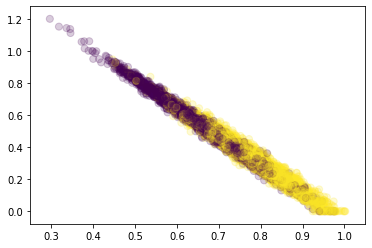

In [116]:
from sklearn.decomposition import NMF
nmf =  NMF(n_components=latent_dim)
X_nmf = nmf.fit_transform(x_train+np.abs(np.min(x_train)))
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y_train, s=50, alpha=.2);
plt.show()

## T-SNE

In [105]:
from sklearn.manifold import TSNE
nmf =  TSNE(n_components=latent_dim)
X_tsne = nmf.fit_transform(x_train)

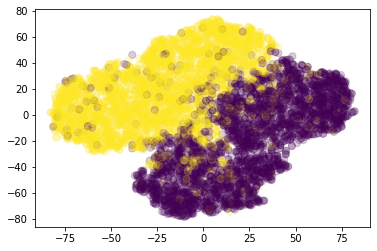

In [108]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, s=50, alpha=.2);
plt.show()